In [0]:
# Basic
import numpy as np
import pandas as pd
import sys
import scipy
import sklearn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Short introduction of variables in the dataset
**Purpose: prediction of whether have High-Density Lipoprotein Cholesterol or not**

The dataset is from the third wave of The Nord-Trøndelag Health Study.It is a unique database of questionnaire data, clinical measurements and samples from a county’s inhabitants from 1984 onwards. https://www.ntnu.edu/hunt


*   Sex :women/men (0/1)
*   BMI  :        Body Mass Index


*   tri  :            Triglycerides 
*   CRP :         Serum micro C-reactive protein 


*   age  :         Age at participation at the start of the health survey
*   dia  :          Diabetes diagnosis ( 0: No;1: Yes)

*   smok :       Smoking status ( 0: Never smoked; 1:Ex smoker; 2:  Current smoker; 3:Occasionally smoker)
*   hdl  :          High-Density Lipoprotein Cholesterol(whether reached the level for dianosis of metabolic syndrome). ( 0: No;1: Yes)



*  phy   :       Level of physical activity ( 0:inactive; 1:active)
*  alcohol:    Alcohol consumption  ( 0:  abstainers; 1:Light drinkers; 2:  Moderate drinkers; 3:Heavy drinkers) 
















In [2]:
#Load local data files to Colaboratory

from google.colab import files

uploaded = files.upload()


Saving diab.csv to diab.csv


In [3]:
# show the keys to access what I just uploaded.
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "diab.csv" with length 2993484 bytes


In [5]:
df = pd.read_csv("diab.csv")
df.head(2)

,Unnamed: 0,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,1,Female,23.7,1.3,1.3,72.1,No,Never smoked,no,active,Light drinkers
1,2,Female,27.3,2.3,3.2,74.6,No,Ex smoker,yes,active,abstainers


**Data Pre-Processing**

In [6]:
df.Sex[df.Sex == 'Female'] = 0
df.Sex[df.Sex == 'Male']   = 1

df.dia[df.dia == 'No'] = 0
df.dia[df.dia == 'Yes'] = 1

df.smok[df.smok == 'Never smoked'] = 0
df.smok[df.smok == 'Ex smoker'] = 1
df.smok[df.smok == 'Current smoker'] = 2
df.smok[df.smok == 'Occasionally smoker'] = 3

df.hdl[df.hdl == 'no'] = 0
df.hdl[df.hdl == 'yes'] = 1

df.phy[df.phy == 'inactive'] = 0
df.phy[df.phy == 'active'] = 1

df.alcohol[df.alcohol == 'abstainers'] = 0
df.alcohol[df.alcohol == 'Light drinkers'] = 1
df.alcohol[df.alcohol == 'Moderate drinkers'] = 2
df.alcohol[df.alcohol == 'Heavy drinkers'] = 3

df.head()

,Unnamed: 0,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,1,0,23.7,1.3,1.3,72.1,0,0,0,1,1
1,2,0,27.3,2.3,3.2,74.6,0,1,1,1,0
2,3,0,20.7,0.6,0.2,59.4,0,0,0,1,1
3,4,1,31.6,1.1,3.8,69.6,0,2,0,1,1
4,5,0,32.1,1.4,4.8,42.0,0,0,1,1,1


In [7]:
# Rename unnamed column 

df.rename( columns={'Unnamed: 0':'id'}, inplace=True )

# delete id column
del df['id']
df.head()

,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
0,0,23.7,1.3,1.3,72.1,0,0,0,1,1
1,0,27.3,2.3,3.2,74.6,0,1,1,1,0
2,0,20.7,0.6,0.2,59.4,0,0,0,1,1
3,1,31.6,1.1,3.8,69.6,0,2,0,1,1
4,0,32.1,1.4,4.8,42.0,0,0,1,1,1


In [8]:
#check number of rows and columns in dataset
df.shape

(35049, 10)

In [9]:
#check the types of each column 
df.dtypes

Sex         object
BMI        float64
tri        float64
CRP        float64
age        float64
dia         object
smok        object
hdl         object
phy         object
alcohol     object
dtype: object

In [0]:
#Convert String Column to Numeric

cols = ['Sex','dia', 'smok', 'hdl', 'phy', 'alcohol']  # We don't want to convert the Final grade column.
for col in cols:  # Iterate over chosen columns
	df[col] = pd.to_numeric(df[col])

**Data Exploration**

In [0]:
df.describe()

,Sex,BMI,tri,CRP,age,dia,smok,hdl,phy,alcohol
count,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000,35049.000000
mean,0.439756,27.150036,1.623088,2.635228,53.068638,0.042483,0.879882,0.295301,0.799310,1.017147
std,0.496364,4.372168,0.991354,5.535303,15.038895,0.201692,0.928638,0.456184,0.400523,0.662455
min,0.000000,12.100000,0.200000,0.000000,19.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.100000,1.000000,0.600000,42.200000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,26.600000,1.400000,1.200000,53.700000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,29.600000,2.000000,2.700000,63.700000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,55.000000,22.600000,160.100000,96.900000,1.000000,3.000000,1.000000,1.000000,3.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35049 entries, 0 to 35048
Data columns (total 10 columns):
Sex        35049 non-null int64
BMI        35049 non-null float64
tri        35049 non-null float64
CRP        35049 non-null float64
age        35049 non-null float64
dia        35049 non-null int64
smok       35049 non-null int64
hdl        35049 non-null int64
phy        35049 non-null int64
alcohol    35049 non-null int64
dtypes: float64(4), int64(6)
memory usage: 2.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7ea485438>,
      dtype=object)

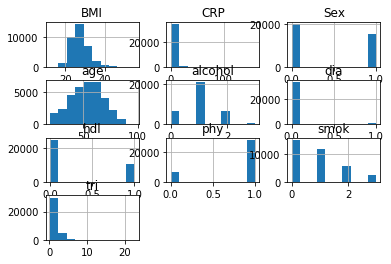

In [0]:
# histogram :representation of the distribution of numerical data
df.hist()

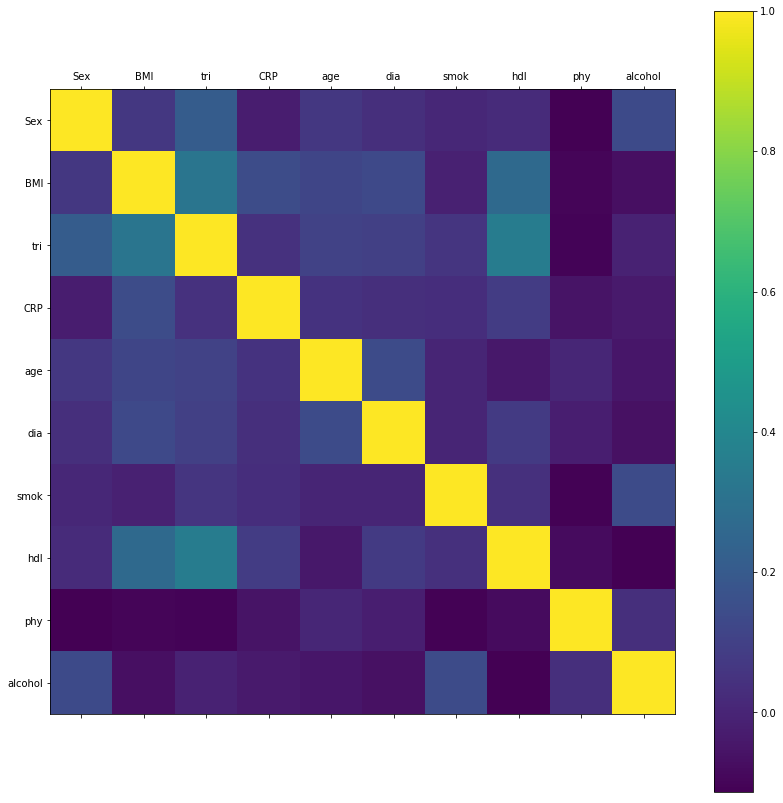

In [0]:
#correlation matrix showing correlation coefficients between variables.

rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

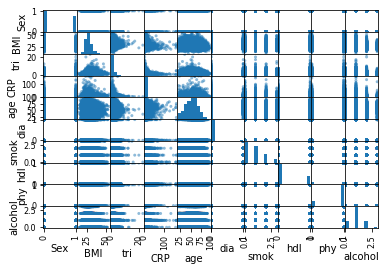

In [0]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

scatter_matrix(df)
plt.show()

In [0]:
#  scale  dataset.
standardScaler = StandardScaler()
columns_to_scale = ['BMI', 'CRP', 'age', 'tri']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [0]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# Train/Test Split
from sklearn.model_selection import train_test_split


**Description of chosen methods.** 




*  K-Nearest Neighbors. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.


* Logistic regression produces a logistic curve, which is limited to values between 0 and 1.Logistic regression is similar to a linear regression, but the curve is constructed using the natural logarithm of the “odds” of the target variable, rather than the probability. Moreover, the predictors do not have to be normally distributed or have equal variance in each group.


* Support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


* A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.  Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.










**What parameters are important to optimize for the chosen ML methods?**


1. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.
2.   Logistic Regression uses maximum likelihood estimation (MLE) rather than ordinary least squares (OLS) to estimate the parameters, therefore its predictions depend upon large-sample approximations.
3. Following are the important parameters for SVM-1]C:It controls the trade off between smooth decision boundary and classifying training points correctly. A large value of c means you will get more training points correctly.2]Gamma:It defines how far the influence of a single training example reaches. If it has a low value it means that every point has a far reach and conversely high value of gamma means that every point has close reach.
4. Random forest: n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data.max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node.

**Which performance measures are used?**
Accuracy score: one metric for evaluating classification models.Accuracy is the fraction of predictions our model got right. 



In [125]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['hdl'],axis=1)
X.head()

,Sex,BMI,tri,CRP,age,dia,smok,phy,alcohol
0,0,-0.789102,-0.325910,-0.241224,1.265494,0,0,1,1
1,0,0.034300,0.682825,0.102032,1.431732,0,1,1,0
2,0,-1.475270,-1.032025,-0.439951,0.421005,0,0,1,1
3,1,1.017808,-0.527657,0.210429,1.099256,0,2,1,1
4,0,1.132169,-0.225036,0.391090,-0.736011,0,0,1,1


In [126]:
# Set Y as Target class, 

y = df['hdl']

# Preview
y.head()

0    0
1    1
2    0
3    0
4    1
Name: hdl, dtype: int64

In [127]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(24534, 9) (24534,)
(10515, 9) (10515,)


**K-Fold Cross Validation**

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As a general rule and empirical evidence, K = 5 or 10 is generally preferred.

** The data split to avoid similar examples in training and validation?**

The data was split randomly to avoid similar exmaples in training and validation


**K nearest neighbors**

In [128]:
#In order to train and test our model using cross-validation, 
#I will use the ‘cross_val_score’ function with a cross-validation value of 5. 
#‘cross_val_score’ takes in the k-NN model and the data as parameters. 
# Then it splits the data into 5 groups and fits and scores the data 5 seperate times, 
# recording the accuracy score in an array each time. 
# Then save the accuracy scores in the ‘cv_scores’ variable.
from sklearn.model_selection import cross_val_score

#create a KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv,X_train, y_train, cv=5)

#print each cv score (accuracy) 
print(cv_scores)

[0.73120033 0.71775015 0.71184023 0.7144895  0.72176926]


In [129]:
# find the average of the 5 scores 
ave_knn = np.mean(cv_scores)
print(ave_knn)

0.719409894814026


In [0]:
# Fit (i.e. traing) the model
knn_cv.fit(X_train, y_train)
pred = knn_cv.predict(X_test)

In [131]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 6358
FP - False Positive 1021
FN - False Negative 1957
TP - True Positive 1179
Accuracy Rate: 0.7167855444602949
Misclassification Rate: 0.2832144555397052


Confusion matrix, without normalization
[[6358 1021]
 [1957 1179]]


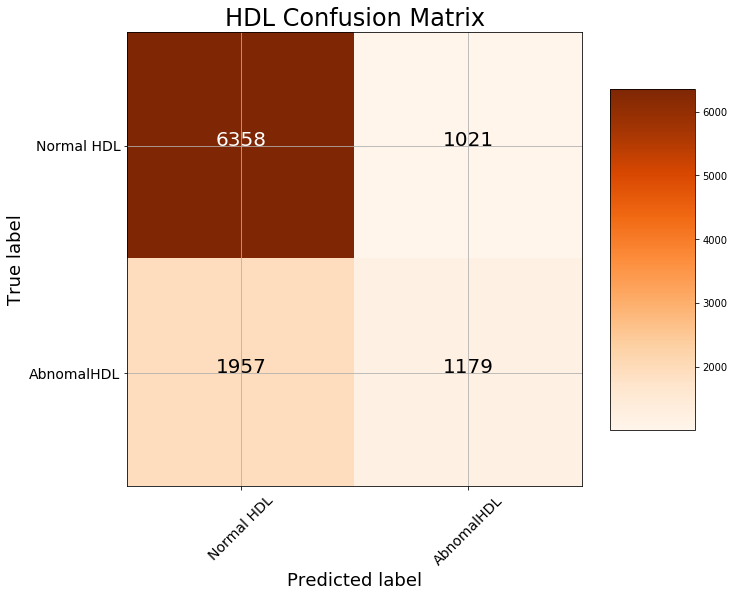

In [103]:
results = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(results, classes = ['Normal HDL', 'AbnomalHDL'], title = 'HDL Confusion Matrix')

In [124]:
#check accuracy of the model on the test data
knn_cv.score(X_test, y_test)
print("Accuracy for knn:", knn_cv.score(X_test, y_test)*100)

Accuracy for knn: 71.67855444602948


### **Using KNN methond, the accuracy score is about 71.68%. **

## ** Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
cv= model_selection.KFold(n_splits=5, random_state=None)

In [132]:
# instantiate the model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# fit the model with data
kfold = KFold(n_splits=5, random_state=42, shuffle=False) 
results=model_selection.cross_val_score(logreg,X_train,y_train,cv=kfold)
print("Accuracy on cv dataset:", results.mean()*100)

Accuracy on cv dataset: 75.10800356670767


In [0]:
#check accuracy of the logistic model on the test data
pred = logreg.predict(X_test)

In [134]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 6836
FP - False Positive 543
FN - False Negative 2130
TP - True Positive 1006
Accuracy Rate: 0.7457917261055634
Misclassification Rate: 0.2542082738944365


In [67]:
print("Accuracy for logtistic regression on test set:", logreg.score(X_test, y_test)*100)

Accuracy for logtistic regression on test set: 74.57917261055634


**Inspect the performance of a classification model is by making a confusion matrix:**

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[6836  543]
 [2130 1006]]


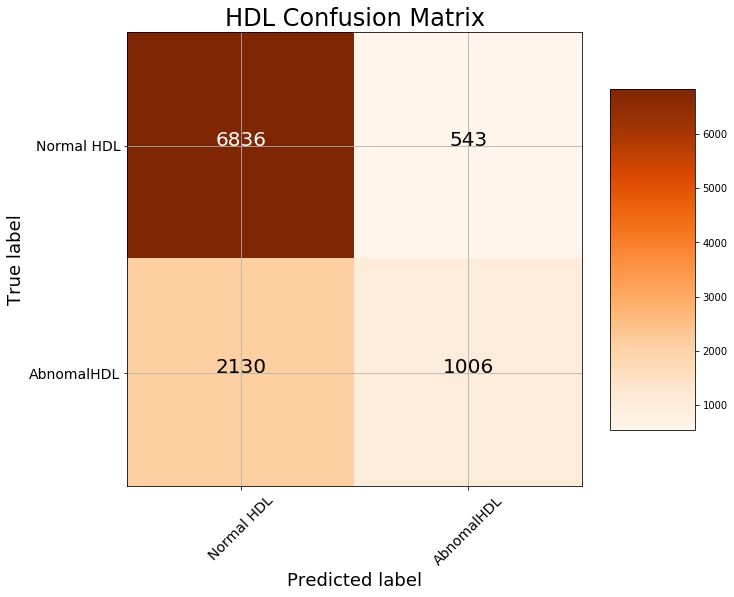

In [69]:
cm_log = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_log, classes = ['Normal HDL', 'AbnomalHDL'], title = 'HDL Confusion Matrix')

### **Using logistic regression methond, the accuracy score is 74.60%.**

## **Support-vector machine**

In [0]:
from sklearn.svm import SVR

scores = []
best_svr = SVR(kernel='rbf')

In [0]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_svr, X_train, y_train, cv=5)

In [107]:
# find the average of the 5 scores for the 5 fold cross validation dateset
ave_svm= np.mean(cv_scores)
print(ave_svm)

0.1018037677609189


In [108]:
#Build model on the training set

best_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#To predict on the test set
y_pred = best_svr.predict(X_test)

In [80]:
#check accuracy of the SVM model on the test data
print("Accuracy for SVM on test set:", best_svr.score(X_test, y_test)*100)

Accuracy for SVM on test set: 8.78629019730407


### **Using SVM methond, the accuracy score is about 8.79%.**

## **Random forest**

In [0]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
rf = RandomForestRegressor()

In [86]:
# find the average of the 5 scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
ave_rf = np.mean(cv_scores)
print(ave_rf)

0.056059870367835773


In [87]:
#Build model on the training set
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
#To predict on the test set
y_pred = rf.predict(X_test)

In [89]:
#check accuracy of the random forest model on the test data
print("Accuracy for random forest on test set:", rf.score(X_test, y_test)*100)

Accuracy for random forest on test set: 6.4641397367322


### **Using the random forest  methond, the accuracy score is about 6.46%.**

### **In conclusion, logistic regression model has much better perfomance on prediction with the accuracy score 74.60%.**

##** Therefore,  logistic regression model will be selected as the final model.



###**find the optimum number of features, for which the accuracy is the highest. I do that by using loop starting with 1 feature and going up to 9. then take the one for which the accuracy is highest.**

In [143]:
#no of features
nof_list=np.arange(1,9)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.751783


### **As seen from above code, the optimum number of features is 5. I now feed 5 as number of features to RFE and get the final set of features given by RFE method**

###**Recursive Feature Elimination**

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [155]:
from sklearn.feature_selection import RFE
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
print("Num Features:", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 5
Selected Features: [False  True  True False  True  True False False  True]
Feature Ranking: [2 1 1 4 1 1 5 3 1]


In [156]:
cols = list(X_train.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['BMI', 'tri', 'age', 'dia', 'alcohol'], dtype='object')


###**From the above output, we can see that RFE chose the the top 5 features as BMI, tri, age,dia and alcohol.These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.**

In [0]:
# Keep only the five most important features in the data
df1 = df.drop(['Sex','CRP','smok','phy'],axis=1)
X = df1.drop(['hdl'],axis=1)
y = df1['hdl']
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

In [172]:
# instantiate the model 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# fit the model with data
kfold = KFold(n_splits=5, random_state=42, shuffle=False) 
results=model_selection.cross_val_score(logreg,X_train,y_train,cv=kfold)
print("Accuracy on cv dataset:", results.mean()*100)

Accuracy on cv dataset: 75.10393606444732


In [0]:
pred = logreg.predict(X_test)

In [174]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 6837
FP - False Positive 542
FN - False Negative 2145
TP - True Positive 991
Accuracy Rate: 0.7444602948169282
Misclassification Rate: 0.2555397051830718


In [180]:
from sklearn.metrics import roc_auc_score 
auc = roc_auc_score(y_test, pred)  
print('AUC: %.2f' % auc) 

AUC: 0.62


## **Therefore, based on the logistic model, BMI, level of triglyceridestri, diabetes and alcohol consumption are important predictors to predict whether people have normal HDL level or not.

##**Conclusions on the difference between ML methods, performance, sensitivity to parameter choices, ease-of-use **
####1.KNN: 

######Advantages :
K-NN is pretty intuitive and simple: K-NN algorithm is very simple to understand and equally easy to implement. K-NN has no assumptions. No Training Step.The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.Very easy to implement for multi-class problem.Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.Variety of distance criteria to be choose from: K-NN algorithm gives user the flexibility to choose distance while building K-NN model.

######Disadvantages :
K-NN slow algorithm.Curse of Dimensionality: KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.
K-NN needs homogeneous features.Optimal number of neighbors: One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.
Imbalanced data causes problems: k-NN doesn’t perform well on imbalanced data. Outlier sensitivity: K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.
Missing Value treatment: K-NN inherently has no capability of dealing with missing value problem.
 
####2.Logistic regression: 

######Advantages :
Easy, fast and simple classification method.
θ parameters explains the direction and intensity of significance of independent variables over the dependent variable.
Can be used for multiclass classifications also.
Loss function is always convex.
#####Disadvantages :
Cannot be applied on non-linear classification problems.
Proper selection of features is required.
Good signal to noise ratio is expected.
Colinearity and outliers tampers the accuracy of LR model.


#### 3. SVM

#####Advantages:
SVM’s are very good when we have no idea on the data.
Works well with even unstructured and semi structured data like text, Images and trees.
The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
Unlike in neural networks, SVM is not solved for local optima.
It scales relatively well to high dimensional data.
SVM models have generalization in practice, the risk of over-fitting is less in SVM.
SVM is always compared with ANN. When compared to ANN models, SVMs give better results.

#####Disadvantages:
Choosing a “good” kernel function is not easy.
Long training time for large datasets.
Difficult to understand and interpret the final model, variable weights and individual impact.
Since the final model is not so easy to see, we can not do small calibrations to the model hence its tough to incorporate our business logic.
The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact


#### 4. Random forest 
#####Advantages:
It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.

Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.
#####Disadvantages:
One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier.
The main limitation of Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model.
